### importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

### loading data

In [2]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')

### cleaning data

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df['category'] = df['v1']
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,category
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,ham
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ham
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,spam
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,ham
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,ham


In [6]:
le = LabelEncoder()
df_dup = df
df.category = le.fit_transform(df.category)
df_dup.head()
df_dup.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis = 1)

,v1,v2,category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [7]:
df.describe()

,category
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
df['category'].value_counts()

0    4825
1     747
Name: category, dtype: int64

### Data Visualization

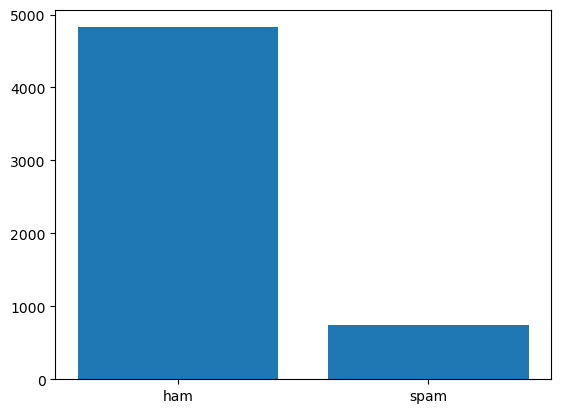

In [9]:
category_counts = df['category'].value_counts()
categories = category_counts.index
plt.bar(categories,category_counts)
labels = ['ham' if category == 0 else 'spam' for category in categories]
plt.xticks(categories,labels)
plt.show()

### splitting data for traing and testing

In [10]:
x_train,x_test,y_train,y_test = train_test_split(df_dup.v2,df_dup.category, test_size = 0.2)

In [11]:
len(x_train)

4457

In [12]:
len(x_test)

1115

### Machine Learing Model

In [13]:
pip = Pipeline([
    ("vectorizer",CountVectorizer()),
    ("model",MultinomialNB())
])

In [16]:
pip.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('model', MultinomialNB())])

In [20]:
emails = [
    "I HAVE A DATE ON SUNDAY WITH WILL!!",
    "Oh k...i'm watching here:)",
    "500 New Mobiles from 2004, MUST GO! Txt: NOKIA to No: 89545 & collect yours today!From ONLY å£1 www.4-tc.biz 2optout 087187262701.50gbp/mtmsg18"
]

In [21]:
pip.predict(emails)
#0 means ham
#1 means spam

array([0, 0, 1])

In [22]:
pip.score(x_test,y_test)

0.9874439461883409